# Classical Mechanics I (PHYS 311)
## Studio 3

*Name: Evan Toon*

*Date: 08-29-2025*

## Introduction

Today we'll:

* start off with a short lecture today to cover some material I wanted to cover on Monday but ran out of time on.
* continue to the studio and use a function called `odeint` to solve some differential equations. This will be helpful for the PS if you haven't figured that part out yet.
* Next studio will contain some of what we cover in today's lecture.
  * (Relevant: https://www.youtube.com/watch?v=mhVbLJvYP8s)

In [79]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib







As you know, the above line sets us up with a lot of common scientific packages. One thing it sets up for us is `scipy` which is a numerical toolkit built on top of `numpy` containing many useful algorithms for scientific work. It has a sub-package of tools called `scipy.integrate`. We're going to use one of its tools: `odeint`. This is in this week's PS and we'll continue to use this tool in the future.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html

Definitely refer back to this documentation -- it's **very** helpful. This function allows you to (numerically) solve a system of first-order ODEs of the form:

$$\frac{dy}{dt}=f(y,t)$$

### scipy.integrate.odeint

Let's import the function `odeint` from the module `scipy.integrate` from the package `scipy`.

In [80]:
from scipy.integrate import odeint

So now we should have access to the `odeint` function. Check out the documentation:

In [81]:
?odeint

This thing is for solving these first order ODEs. Let's do that. Let's try solving the DE:

$$\dot{y}+y^2=t$$

with the boundary condition (BC) that:

$$y(t=0)=0$$

First we'll need to code up an expression for this ODE.

In [82]:
def dydt(y,t): #define a function for dy/dt that's dependent on y and t
    # We want to return a value for the first derivative of y
    # ydot = t-y^2
    # So let's return this...
    return t-y*y

See how that's just a representation of our ODE? Let's see how to use `odeint`. If we go back to the documentation, the way we call it is with three required arguments:

1. The function that represents your ODE. It's assumed that you've isolated the derivative to one side, and this function returns the "other side" of your ODE. You hand it this function as a "callable", so when handing it the function above, you would hand it just `dydt` and not `dydt()` or `dydt(stuff)`.
2. The initial condition y0
3. Your independent variable t

And you'll hand these to `odeint([here], [here], [and here])`.

You can hand it (computing, not physics) vectors to handle systems of ODEs, but we'll get to that later.

Let's give it an array of `t` values to play with.

In [83]:
t_array = linspace(0, 50, 100)

### I increased the values in t_array to get a better resolution in my final plots (make the curves less jagged and more sine wave like)

Remember to try out a `?linspace` and then a `type(t_array)` to get an understanding of what you're creating here. `linspace(A,B,C)` is a function that will create a numpy array for you with numbers between `A` and `B` equally sliced up into `C` numbers. Go ahead -- take a look by printing out what `t_array` has.

In [84]:
print(t_array)

[ 0.          0.50505051  1.01010101  1.51515152  2.02020202  2.52525253
  3.03030303  3.53535354  4.04040404  4.54545455  5.05050505  5.55555556
  6.06060606  6.56565657  7.07070707  7.57575758  8.08080808  8.58585859
  9.09090909  9.5959596  10.1010101  10.60606061 11.11111111 11.61616162
 12.12121212 12.62626263 13.13131313 13.63636364 14.14141414 14.64646465
 15.15151515 15.65656566 16.16161616 16.66666667 17.17171717 17.67676768
 18.18181818 18.68686869 19.19191919 19.6969697  20.2020202  20.70707071
 21.21212121 21.71717172 22.22222222 22.72727273 23.23232323 23.73737374
 24.24242424 24.74747475 25.25252525 25.75757576 26.26262626 26.76767677
 27.27272727 27.77777778 28.28282828 28.78787879 29.29292929 29.7979798
 30.3030303  30.80808081 31.31313131 31.81818182 32.32323232 32.82828283
 33.33333333 33.83838384 34.34343434 34.84848485 35.35353535 35.85858586
 36.36363636 36.86868687 37.37373737 37.87878788 38.38383838 38.88888889
 39.39393939 39.8989899  40.4040404  40.90909091 41.

So now we have all the ingredients we need. Try to hand this information over to `odeint`! Store the return value of `odeint` as a variable called `y`. Let's start with an initial value for y of `y0=0`.

In [85]:
# initial condition
y0 = 0

# solve
y = odeint(dydt, y0, t_array)

Print out the values of `y`. Notice that it has a strange structure. It's an array of arrays, since this thing is capable of solving systems of ODEs. But we only care about the first (and only) element of each top level element.

In [86]:
print(y)

[[0.        ]
 [0.12592093]
 [0.46356335]
 [0.86894541]
 [1.20512383]
 [1.45114436]
 [1.64048033]
 [1.7998457 ]
 [1.94203716]
 [2.07269464]
 [2.19464063]
 [2.30957036]
 [2.41864371]
 [2.52271468]
 [2.62244001]
 [2.71833985]
 [2.81083561]
 [2.90027492]
 [2.98694883]
 [3.07110415]
 [3.15295248]
 [3.23267691]
 [3.31043722]
 [3.38637388]
 [3.46061116]
 [3.53325972]
 [3.60441857]
 [3.67417672]
 [3.74261467]
 [3.80980537]
 [3.87581522]
 [3.94070494]
 [4.00453014]
 [4.06734197]
 [4.12918758]
 [4.19011055]
 [4.25015126]
 [4.30934723]
 [4.36773334]
 [4.42534217]
 [4.48220412]
 [4.53834769]
 [4.59379956]
 [4.64858484]
 [4.7027271 ]
 [4.75624859]
 [4.80917028]
 [4.86151199]
 [4.91329245]
 [4.96452942]
 [5.01523973]
 [5.06543936]
 [5.11514349]
 [5.16436657]
 [5.21312236]
 [5.26142394]
 [5.30928385]
 [5.356714  ]
 [5.40372582]
 [5.45033022]
 [5.49653763]
 [5.54235808]
 [5.58780113]
 [5.63287601]
 [5.67759154]
 [5.7219562 ]
 [5.76597814]
 [5.80966522]
 [5.85302497]
 [5.89606466]
 [5.93879129]
 [5.98

So our ODE is telling us how `y` changes (the slope) as a function of `t`. So we just need to tell is where `y` starts at `t=0` and then the behavior of `y` itself is fully constrained.

Think of these differential equations like a conversation. Imagine I say: "I'm driving 50 mph due west. Where am I after a half an hour?" You'd then say "depends on where you started" (this is your boundary condition). I reply that I start in downtown Knoxville. Then you know that I'm roughly in Oak Ridge and you can answer the original question.

This `y` array is now telling us for each time in `t_array`, what the value of `y` is. Plot `y` as a function of `t_array` to see the behavior. (Recall how to get just the first column of an array of arrays with `[:,0]`.)

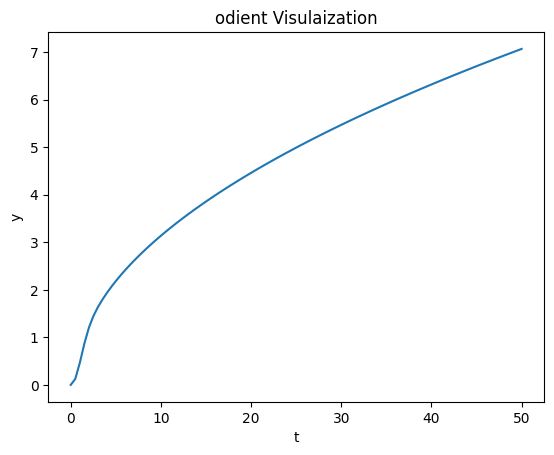

In [87]:
#plot
plt.plot(t_array, y[:, 0])
plt.xlabel('t')
plt.ylabel('y')
plt.title('odient Visulaization')
plt.show()

## Second order ODEs

As mentioned above, we can also use this `odeint` to solve higher order ODEs, but unfortunately, we can only do so by e.g. expressing a 2nd order ODE as a system of *two* 1st order ODEs.

Let's see how to do this with a simple Hooke's law example of the form:

$$m\ddot{x}=-kx$$

This means that the only force here is a simple restorative, linear force. When $x$ is positive, the force pushes it to smaller values. When $x$ is negative, the force pushes it to larger values.

You'll need to define the velocity `v` as the first derivative of `x`. And then separately, you'll want to tell it the value of the first derivative of `v` (which is of course the acceleration).

$$\frac{dx}{dt}=v$$
$$\frac{dv}{dt}=-kx/m$$

`odeint` is expecting to get handed a function that can take a list of inputs, it'll return the value of the differentiated variable. So let's write such a function. (I'll give you a head-start skeleton, but **you have to fill in the missing parts!**)

In [88]:
def ode_system(inputs, t, m, k):
    # Let's decide from the start that we'll hand this function our `inputs` as [x,v].
    # ... That way, we can unpack the values stored in `inputs` with:

    [x, v] = inputs
    # ... (or equivalently just `x, v = inputs`)
    dxdt = v
    dvdt = -k*x / m



    # Then we have to return a list of the derivatives. The first element should be an
    # ... expression for dx/dt, and the second, an expression for dv/dt.
    # ... Notice that m (the mass) and k (the spring strength) are also inputs to this function
    return [dxdt,dvdt ]

Now remember that `odeint` is going to need the initial conditions. So we have to give it a list of initial values for our two variables `x` and `v`. Let's start our system at a displacement of `x=1` and no starting speed. This will be the second argument for `odeint`.

And the final required argument for `odeint` is a time axis (or more generally, the independent variable axis). This shouldn't be a list since both ODEs are functions of the same, single independent variable `t`. So you can use `linspace` as above.

Finally, we have to somehow tell `odeint` to pass on a values of `m` and `k` to our `ode_system` function. We can do that by handing `odeint` the explicit "keyword" argument `args=(m,k)` with whatever values of `m` and `k` you like. These args need to be handed in the form of a python "tuple" (denoted with parentheses) which is like a list, but can't change size. Let's store the result in a variable called `solution`.

(n.b. in python, keyword arguments must come after the non-keyword arguments.)

In [89]:
x = 1
v0 = 0
t = t_array

m = 10  # kg
k = 1   # N/m

# make initial conditions a list
initial_conditions = [x, v0]

# solve
solution = odeint(ode_system, initial_conditions, t, args=(m, k))

Once you have the output of your `odeint` call, **print it out** to understand the structure of it. You should have an array where each element is a mini-array containing the output of your `ode_system` function. So the first element is the position, and the second is the velocity, in this example.

In [90]:
print(solution)

[[ 1.00000000e+00  0.00000000e+00]
 [ 9.87273288e-01 -5.02906206e-02]
 [ 9.49417073e-01 -9.93011747e-02]
 [ 8.87394941e-01 -1.45784155e-01]
 [ 8.02785565e-01 -1.88556436e-01]
 [ 6.97742542e-01 -2.26529308e-01]
 [ 5.74939603e-01 -2.58736234e-01]
 [ 4.37502481e-01 -2.84357438e-01]
 [ 2.88929416e-01 -3.02740770e-01]
 [ 1.33002107e-01 -3.13418312e-01]
 [-2.63105611e-02 -3.16118285e-01]
 [-1.84953536e-01 -3.10771963e-01]
 [-3.38888802e-01 -2.97515431e-01]
 [-4.84198187e-01 -2.76686113e-01]
 [-6.17183089e-01 -2.48814185e-01]
 [-7.34458570e-01 -2.14609083e-01]
 [-8.33039557e-01 -1.74941444e-01]
 [-9.10416831e-01 -1.30820945e-01]
 [-9.64620876e-01 -8.33706039e-02]
 [-9.94272015e-01 -3.37981949e-02]
 [-9.98615522e-01  1.66344945e-02]
 [-9.77540842e-01  6.66437783e-02]
 [-9.31584396e-01  1.14956748e-01]
 [-8.61915938e-01  1.60343674e-01]
 [-7.70308768e-01  2.01649304e-01]
 [-6.59094601e-01  2.37822269e-01]
 [-5.31104218e-01  2.67941844e-01]
 [-3.89595414e-01  2.91241381e-01]
 [-2.38170071e-01  3

Recall how to grab just the first or second column from this structure (from last week). And use that to plot the position as a function of time below.

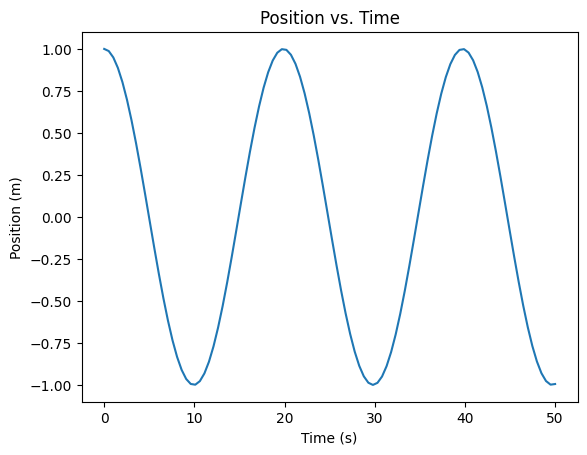

In [91]:
x_values = solution[:,0]

plt.plot(t, x_values)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')
plt.show()

And let's also plot the velocity as a function of time.

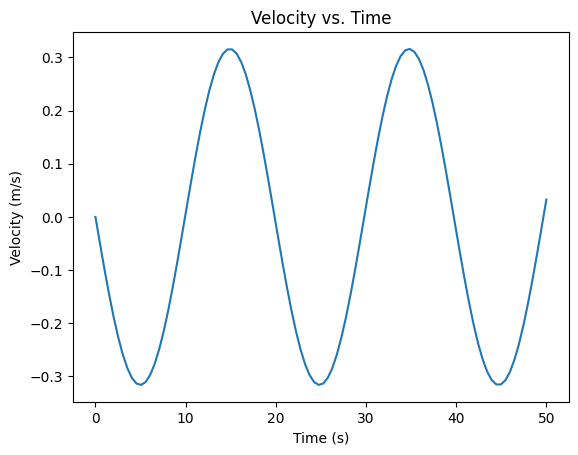

In [92]:
v_values = solution[:,1]

plt.plot(t, v_values)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('Velocity vs. Time')
plt.show()

You should be able to recognize these as the standard harmonic oscillator solutions of a sine wave. That'll be it for today! You'll use this technique in the PS if you haven't already done it.

If you've still got time, feel free to go through the extra credit below!

**EC(+0.5): Draw both of these results on the same plot. Draw one of them in UT orange. And draw the other with a dashed line. Draw a legend so that it's easy to read. Label the axes correctly.**

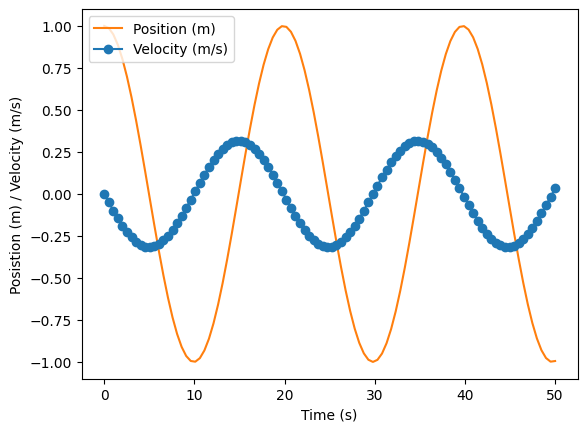

In [93]:
plt.plot(t, x_values, color='tab:orange', label='Position (m)')
plt.plot(t, v_values, 'o-', label='Velocity (m/s)')
plt.xlabel('Time (s)')
plt.ylabel('Posistion (m) / Velocity (m/s)')
plt.legend()
plt.show()

**EC(+0.5): Calculate and draw the solution for three different values of the spring constant `k`. Again differentiate them in a useful way, and draw a legend that specifies the value of `k` for each. If you know about python `dict`s and looping over lists, this will make the bookkeeping much easier! Some hint code below:**

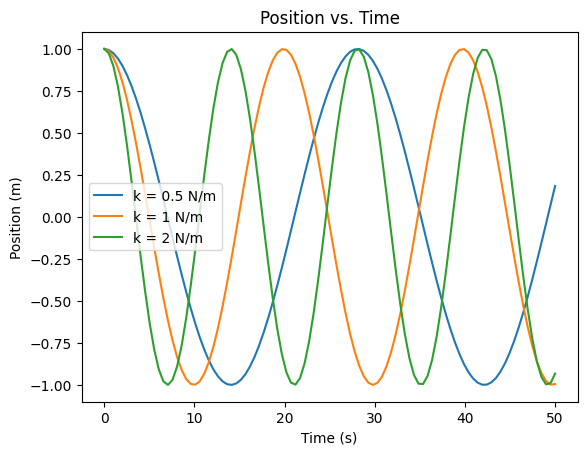

In [94]:
solutions = {} # creates a dict. It's like a list, but is "keyed" by any object, not just an integer index.
k_values = [0.5, 1, 2]

for my_k in k_values: # fill up this list with values of k you'd like to use. And then loop over that list.

  # We can create a new object and store it in solutions[key], where key can be anything.
  # May as well make it the value of k. That way, it'll be easy to access the result later.


  solutions[my_k] = odeint(ode_system, initial_conditions, t, args=(m, my_k)) # here, you'll want to put in your odeint call, and hand it your temporary value of k
  # Then you can plot the solutions.
  x_vals = solutions[my_k][:,0]
  plt.plot(t, x_vals, label=f'k = {my_k} N/m')

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Position vs. Time')
plt.legend()
plt.show()

**EC(+0.5): Plot a few (at least four) different initial conditions -- both the starting position and velocity (keeping the spring constant the same). What happens if you start at `[x0,v0]=[0,0]`? Using the `dict` structure is super helpful here too! As always, make sure it's clearly labeled on the plot what the values are for each curve.**

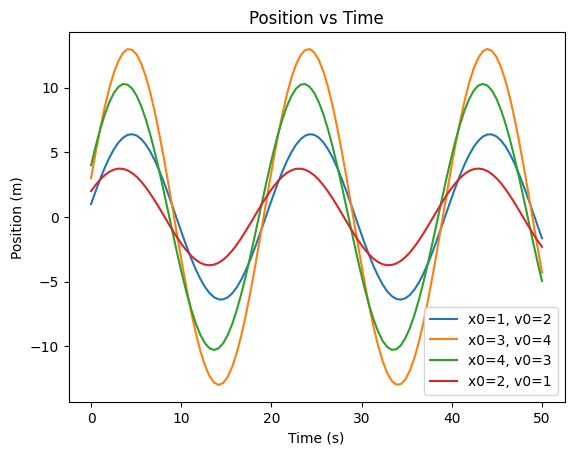

In [95]:
solutions = {}
initial_conditions = [1,2], [3,4], [4,3], [2,1]

for i in initial_conditions:
  name = f'x0={i[0]}, v0={i[1]}'
  solutions[name] = odeint(ode_system, i, t, args=(m,k))
  x_vals = solutions[name][:,0]
  plt.plot(t, x_vals, label=name)

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title(f'Position vs Time')
plt.legend()
plt.show()